In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\maeve\Downloads\archive (5).zip")
df.head()


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [16]:
df['Sentiment'].unique()

array([' Positive  ', ' Negative  ', ' Neutral   ', ' Anger        ',
       ' Fear         ', ' Sadness      ', ' Disgust      ',
       ' Happiness    ', ' Joy          ', ' Love         ',
       ' Amusement    ', ' Enjoyment    ', ' Admiration   ',
       ' Affection    ', ' Awe          ', ' Disappointed ',
       ' Surprise     ', ' Acceptance   ', ' Adoration    ',
       ' Anticipation ', ' Bitter       ', ' Calmness     ',
       ' Confusion    ', ' Excitement   ', ' Kind         ',
       ' Pride        ', ' Shame        ', ' Confusion ', ' Excitement ',
       ' Shame ', ' Elation       ', ' Euphoria      ', ' Contentment   ',
       ' Serenity      ', ' Gratitude     ', ' Hope          ',
       ' Empowerment   ', ' Compassion    ', ' Tenderness    ',
       ' Arousal       ', ' Enthusiasm    ', ' Fulfillment  ',
       ' Reverence     ', ' Compassion', ' Fulfillment   ', ' Reverence ',
       ' Elation   ', ' Despair         ', ' Grief           ',
       ' Loneliness     

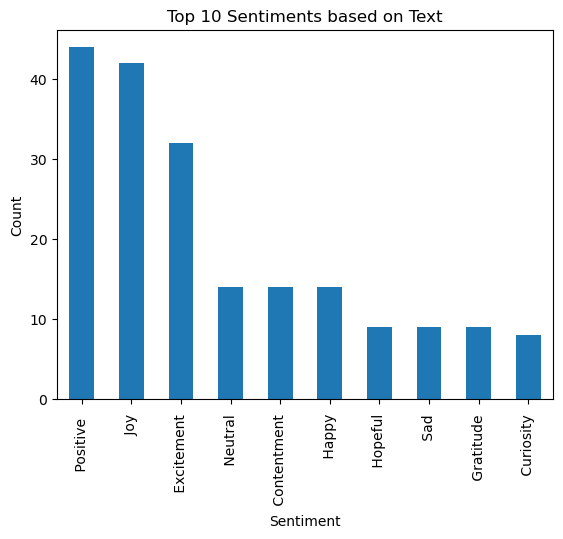

In [7]:
df['Sentiment'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Sentiments based on Text')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [8]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [9]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embedding(text):
    tokens = tokenizer(text, padding=True, truncation=True, return_tensors="pt")
    with torch.no_grad():
        output = model(**tokens)
    return output.last_hidden_state.mean(dim=1).squeeze().numpy()  # Average pooling

df['caption_embedding'] = df['Text'].apply(get_bert_embedding)


C:\Users\maeve\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(


In [10]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,caption_embedding
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,"[0.0132342335, -0.46569663, 0.18299887, 0.2681..."
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,"[0.32782668, -0.34882212, -0.11327601, -0.0705..."
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,"[0.35845104, -0.21438128, -0.123454995, -0.300..."
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,"[0.046097092, -0.58010054, 0.3131954, 0.203077..."
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,"[0.33468997, -0.30763033, 0.19412471, -0.02471..."


In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd


analyzer = SentimentIntensityAnalyzer()

df['Vader_Score'] = df['Text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

df['Sentiment'] = df['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

print(df[['Text', 'Vader_Score', 'Sentiment']].head(10))

                                                Text  Vader_Score Sentiment
0   Enjoying a beautiful day at the park!        ...       0.8221  positive
1   Traffic was terrible this morning.           ...      -0.4767  negative
2   Just finished an amazing workout! 💪          ...       0.6239  positive
3   Excited about the upcoming weekend getaway!  ...       0.4003  positive
4   Trying out a new recipe for dinner tonight.  ...       0.0000   neutral
5   Feeling grateful for the little things in lif...       0.5423  positive
6   Rainy days call for cozy blankets and hot coc...      -0.0772  negative
7   The new movie release is a must-watch!       ...       0.0000   neutral
8   Political discussions heating up on the timel...       0.0000   neutral
9   Missing summer vibes and beach days.         ...      -0.2960  negative


In [12]:
df['Sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [17]:
df['Country'].unique()

array([' USA      ', ' Canada   ', ' USA        ', ' UK       ',
       ' Australia ', ' India    ', ' USA    ', 'USA', ' Canada    ',
       ' USA       ', ' USA ', ' Canada  ', ' UK ', ' India     ',
       ' Canada ', ' UK        ', ' India ', ' UK   ', ' UK         ',
       ' USA     ', ' Canada     ', ' USA          ', ' India      ',
       ' Australia  ', ' UK           ', ' Canada       ',
       ' Australia   ', ' Australia    ', ' UK            ', ' USA   ',
       ' India       ', ' UK          ', ' USA  ', ' UK      ',
       ' Canada      ', ' India   ', ' Canada          ',
       ' India        ', ' Australia     ', ' Canada        ',
       ' India         ', ' USA           ', ' USA               ',
       ' Canada            ', ' UK                ',
       ' India              ', ' Australia          ',
       ' France            ', ' Brazil            ',
       ' Japan             ', ' Greece            ',
       ' India             ', ' Brazil           ', ' Franc